In [4]:
#라이브러리 셋 불러오기
import json
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas import json_normalize
from datetime import datetime

#데이터프레임
df = pd.read_csv('C:/Users/parks/OneDrive/문서/GitHub/sparta_ml/train.csv')

C:\Users\parks\AppData\Local\Temp\ipykernel_7588\3539464341.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/parks/OneDrive/문서/GitHub/sparta_ml/train.csv')


In [5]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [6]:
#POSIX 타임 변환
df['new_visit_time'] = pd.to_datetime(df['visitStartTime'], unit='s')

df.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visit_time
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,2016-09-03 05:40:13
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,2016-09-02 13:23:20


In [7]:
#device 칼럼 내 json 데이터 추출
device_df = json_normalize(df['device'].apply(json.loads))
device_df.head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [8]:
device_df = device_df[['browser', 'deviceCategory', 'operatingSystem']]
device_df

,browser,deviceCategory,operatingSystem
0,Chrome,desktop,Windows
1,Firefox,desktop,Macintosh
2,Chrome,desktop,Windows
3,UC Browser,desktop,Linux
4,Chrome,mobile,Android
...,...,...,...
903648,Chrome,desktop,Windows
903649,Chrome,mobile,Android
903650,Android Webview,mobile,Android
903651,Chrome,desktop,Windows


In [9]:
#geoNetwork 칼럼 내 json 데이터 추출
geoNetwork_df = json_normalize(df['geoNetwork'].apply(json.loads))
geoNetwork_df.head(5)

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [10]:
#데이터 내 필요한 칼럼만 추출
geoNetwork_df = geoNetwork_df[['continent', 'country']]
geoNetwork_df.head()

,continent,country
0,Asia,Turkey
1,Oceania,Australia
2,Europe,Spain
3,Asia,Indonesia
4,Europe,United Kingdom


In [11]:
#totals 칼럼 내 json 데이터 추출
totals_df = json_normalize(df['totals'].apply(json.loads))
totals_df.head()

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,1,NaN
4,1,1,1,1,NaN,NaN


In [12]:
#trafficSource 칼럼 내 json 데이터 추출
trafficSource_df = json_normalize(df['trafficSource'].apply(json.loads))
trafficSource_df.head()

,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(not set),google,organic,google + online,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#데이터 내 필요한 칼럼만 추출
trafficSource_df = trafficSource_df[['source', 'keyword']]
trafficSource_df.head()

,source,keyword
0,google,(not provided)
1,google,(not provided)
2,google,(not provided)
3,google,google + online
4,google,(not provided)


In [14]:
#원본 데이터 내 json으로 묶여있는 데이터 drop
df = df.drop(['device', 'geoNetwork', 'trafficSource', 'totals'], axis = 1)
df.head(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,new_visit_time
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,2016-09-02 15:33:05
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,2016-09-03 05:22:27
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,2016-09-03 01:16:26
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,2016-09-03 05:40:13
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,2016-09-02 13:23:20


In [15]:
#필요한 데이터들만 concat
df_new = pd.concat([device_df, geoNetwork_df, trafficSource_df, totals_df], axis=1)
df_new

,browser,deviceCategory,operatingSystem,continent,country,source,keyword,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Chrome,desktop,Windows,Asia,Turkey,google,(not provided),1,1,1,1,1,NaN
1,Firefox,desktop,Macintosh,Oceania,Australia,google,(not provided),1,1,1,1,1,NaN
2,Chrome,desktop,Windows,Europe,Spain,google,(not provided),1,1,1,1,1,NaN
3,UC Browser,desktop,Linux,Asia,Indonesia,google,google + online,1,1,1,1,1,NaN
4,Chrome,mobile,Android,Europe,United Kingdom,google,(not provided),1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Chrome,desktop,Windows,Americas,Puerto Rico,youtube.com,NaN,1,17,15,NaN,1,NaN
903649,Chrome,mobile,Android,Asia,Sri Lanka,youtube.com,NaN,1,18,13,NaN,1,NaN
903650,Android Webview,mobile,Android,Asia,South Korea,youtube.com,NaN,1,24,21,NaN,1,NaN
903651,Chrome,desktop,Windows,Asia,Indonesia,facebook.com,NaN,1,24,22,NaN,1,NaN


In [16]:
df3 = pd.concat([df, df_new], axis=1)
df3

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,new_visit_time,browser,...,continent,country,source,keyword,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,2016-09-02 15:33:05,Chrome,...,Asia,Turkey,google,(not provided),1,1,1,1,1,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,2016-09-03 05:22:27,Firefox,...,Oceania,Australia,google,(not provided),1,1,1,1,1,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,2016-09-03 01:16:26,Chrome,...,Europe,Spain,google,(not provided),1,1,1,1,1,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,2016-09-03 05:40:13,UC Browser,...,Asia,Indonesia,google,google + online,1,1,1,1,1,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,2016-09-02 13:23:20,Chrome,...,Europe,United Kingdom,google,(not provided),1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,2017-01-04 18:32:30,Chrome,...,Americas,Puerto Rico,youtube.com,NaN,1,17,15,NaN,1,NaN
903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,2017-01-04 15:29:58,Chrome,...,Asia,Sri Lanka,youtube.com,NaN,1,18,13,NaN,1,NaN
903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,2017-01-04 10:40:34,Android Webview,...,Asia,South Korea,youtube.com,NaN,1,24,21,NaN,1,NaN
903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,2017-01-05 05:07:44,Chrome,...,Asia,Indonesia,facebook.com,NaN,1,24,22,NaN,1,NaN


In [17]:
df3 = df3.drop(['keyword', 'newVisits', 'socialEngagementType', 'date'], axis = 1)

In [18]:
#결측치 0으로 대체
df3['transactionRevenue'] = df3['transactionRevenue'].fillna(0)

In [19]:
#결측치 0으로 대체
df3['bounces'] = df3['bounces'].fillna(0)

In [20]:
#결측치 0으로 대체
df3['pageviews'] = df3['pageviews'].fillna(0)

In [21]:
#totals 문자열 칼럼 숫자형으로 변환
df3['visits']= df3['visits'].astype(int)
df3['hits']= df3['hits'].astype(int)
df3['bounces']= df3['bounces'].astype(int)
df3['pageviews']= df3['pageviews'].astype(int)
df3['transactionRevenue']= df3['transactionRevenue'].astype(float)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   visitStartTime      903653 non-null  int64         
 6   new_visit_time      903653 non-null  datetime64[ns]
 7   browser             903653 non-null  object        
 8   deviceCategory      903653 non-null  object        
 9   operatingSystem     903653 non-null  object        
 10  continent           903653 non-null  object        
 11  country             903653 non-null  object        
 12  source              903653 non-null  object        
 13  visits              903653 no

In [23]:
df3.describe()

,visitId,visitNumber,visitStartTime,new_visit_time,visits,hits,pageviews,bounces,transactionRevenue
count,9.036530e+05,903653.000000,9.036530e+05,903653,903653.0,903653.000000,903653.000000,903653.000000,9.036530e+05
mean,1.485007e+09,2.264897,1.485007e+09,2017-01-21 14:01:30.059528448,1.0,4.596538,3.849338,0.498676,1.704273e+06
min,1.470035e+09,1.000000,1.470035e+09,2016-08-01 07:00:12,1.0,1.000000,0.000000,0.000000,0.000000e+00
25%,1.477561e+09,1.000000,1.477561e+09,2016-10-27 09:39:29,1.0,1.000000,1.000000,0.000000,0.000000e+00
50%,1.483949e+09,1.000000,1.483949e+09,2017-01-09 08:02:14,1.0,2.000000,1.000000,0.000000,0.000000e+00
75%,1.492759e+09,1.000000,1.492759e+09,2017-04-21 07:12:42,1.0,4.000000,4.000000,1.000000,0.000000e+00
max,1.501657e+09,395.000000,1.501657e+09,2017-08-02 06:59:53,1.0,500.000000,469.000000,1.000000,2.312950e+10
std,9.022124e+06,9.283735,9.022124e+06,NaN,0.0,9.641437,7.025002,0.499999,5.277866e+07


In [24]:
df3.columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'new_visit_time', 'browser',
       'deviceCategory', 'operatingSystem', 'continent', 'country', 'source',
       'visits', 'hits', 'pageviews', 'bounces', 'transactionRevenue'],
      dtype='object')

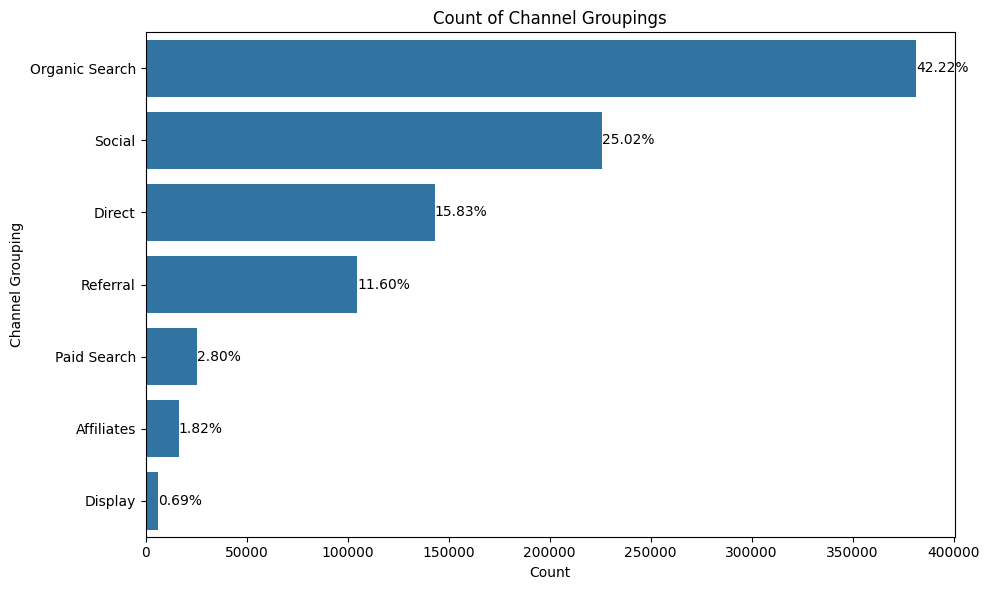

In [25]:
# channelGrouping 값별 빈도수 계산
channel_counts = df3['channelGrouping'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(7)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax = sns.countplot(data=df3, y='channelGrouping', order=channel_counts_sorted.index)
plt.title('Count of Channel Groupings')
plt.xlabel('Count')
plt.ylabel('Channel Grouping')

# 각 카테고리에 대한 비율 표시
total = len(df3['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

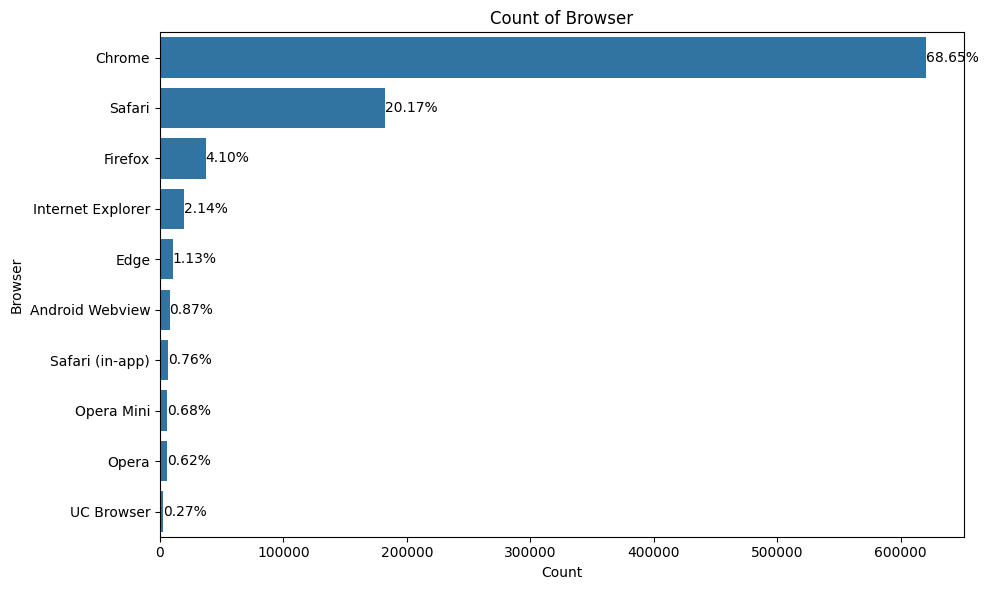

In [26]:
# device_browser 값별 빈도수 계산
channel_counts = df3['browser'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_2 = sns.countplot(data=df3, y='browser', order=channel_counts_sorted.index)
plt.title('Count of Browser')
plt.xlabel('Count')
plt.ylabel('Browser')

# 각 카테고리에 대한 비율 표시
total = len(df3['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_2.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

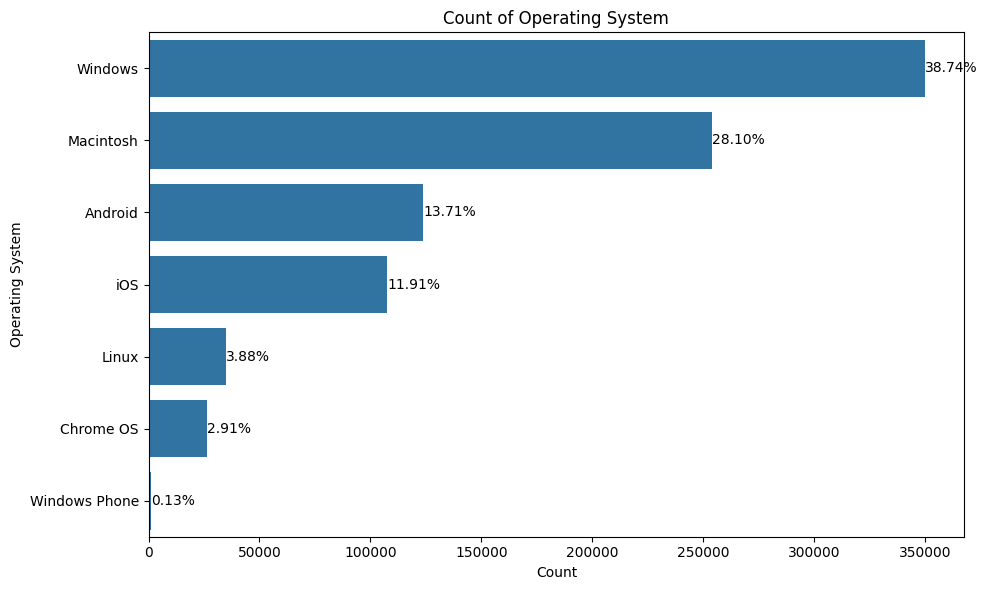

In [27]:
# device_operatingSystem 값별 빈도수 계산(not set 값은 제외)
channel_counts = df3[df3['operatingSystem'] != '(not set)']['operatingSystem'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(7)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_3 = sns.countplot(data=df3, y='operatingSystem', order=channel_counts_sorted.index)
plt.title('Count of Operating System')
plt.xlabel('Count')
plt.ylabel('Operating System')

# 각 카테고리에 대한 비율 표시
total = len(df3['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_3.text(v + 3, i, f'{v / total:.2%}', va='center')

plt.tight_layout()    
plt.show

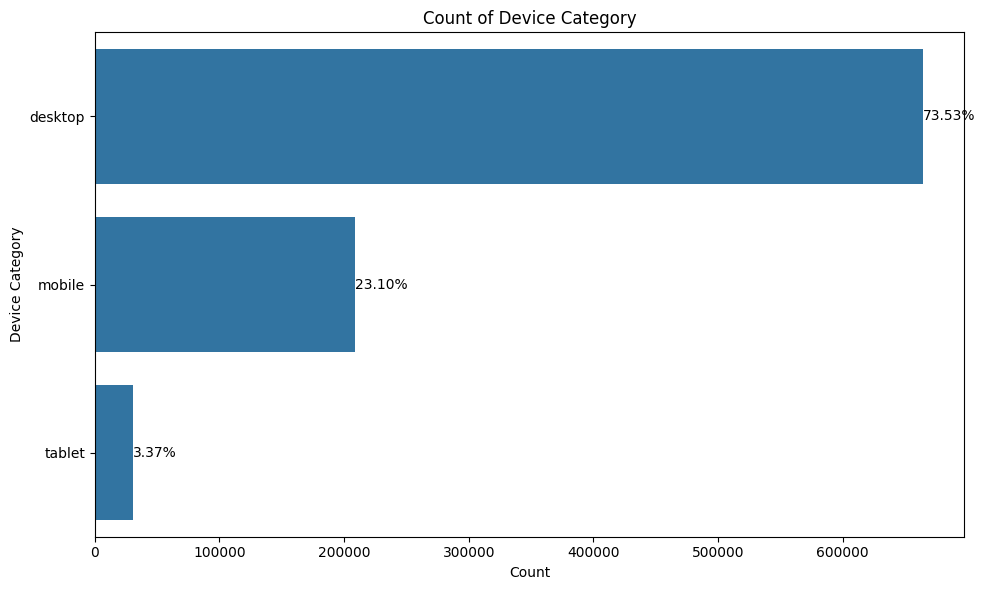

In [28]:
# device_deviceCategory 값별 빈도수 계산
channel_counts = df3['deviceCategory'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_4 = sns.countplot(data=df3, y='deviceCategory', order=channel_counts_sorted.index)
ax.patch.set_facecolor('none')
plt.title('Count of Device Category')
plt.xlabel('Count')
plt.ylabel('Device Category')

# 각 카테고리에 대한 비율 표시
total = len(df3['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_4.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

In [29]:
df3['new_date'] = df3['new_visit_time'].dt.date
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   visitStartTime      903653 non-null  int64         
 6   new_visit_time      903653 non-null  datetime64[ns]
 7   browser             903653 non-null  object        
 8   deviceCategory      903653 non-null  object        
 9   operatingSystem     903653 non-null  object        
 10  continent           903653 non-null  object        
 11  country             903653 non-null  object        
 12  source              903653 non-null  object        
 13  visits              903653 no

In [30]:
df3['new_date'] = pd.to_datetime(df3['new_date'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   visitStartTime      903653 non-null  int64         
 6   new_visit_time      903653 non-null  datetime64[ns]
 7   browser             903653 non-null  object        
 8   deviceCategory      903653 non-null  object        
 9   operatingSystem     903653 non-null  object        
 10  continent           903653 non-null  object        
 11  country             903653 non-null  object        
 12  source              903653 non-null  object        
 13  visits              903653 no

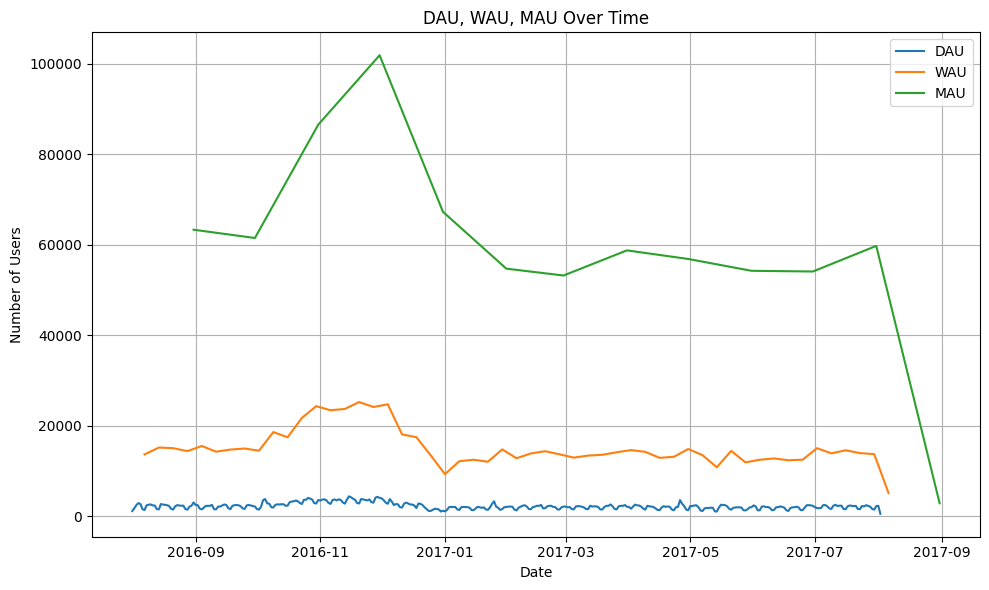

In [31]:
# 일(day) 그룹별로 고유한 방문자 수 계산
DAU = df3.groupby(df3['new_date'].dt.date)['fullVisitorId'].nunique()

# 주(week) 그룹별로 고유한 방문자 수 계산
WAU = df3.groupby(df3['new_date'].dt.to_period('W'))['fullVisitorId'].nunique()

# 월(month) 그룹별로 고유한 방문자 수 계산
MAU = df3.groupby(df3['new_date'].dt.to_period('M'))['fullVisitorId'].nunique()

# 그래프 그리기
plt.figure(figsize=(10, 6), facecolor='none')

# DAU 그래프
plt.plot(DAU.index, DAU.values, label='DAU')

# WAU 그래프
plt.plot(WAU.index, WAU.values, label='WAU')

# MAU 그래프
plt.plot(MAU.index, MAU.values, label='MAU')

plt.title('DAU, WAU, MAU Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

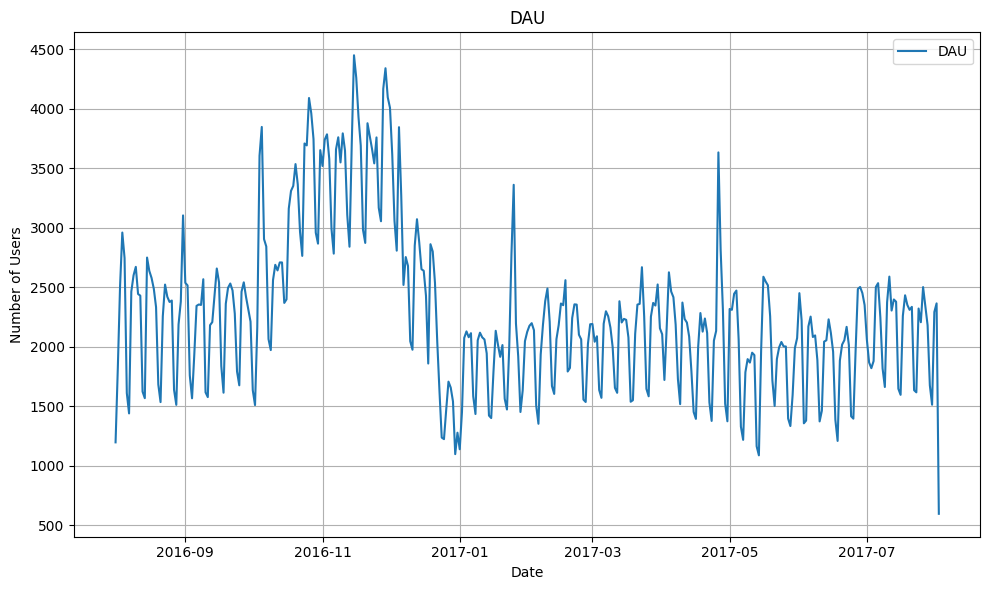

In [32]:
# 일(day), 주(week), 월(month) 그룹별로 고유한 방문자 수 계산
DAU = df3.groupby(df3['new_visit_time'].dt.date)['fullVisitorId'].nunique()
# 그래프 그리기
plt.figure(figsize=(10, 6), facecolor='none')
# DAU 그래프
plt.plot(DAU, label='DAU')
plt.title('DAU')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

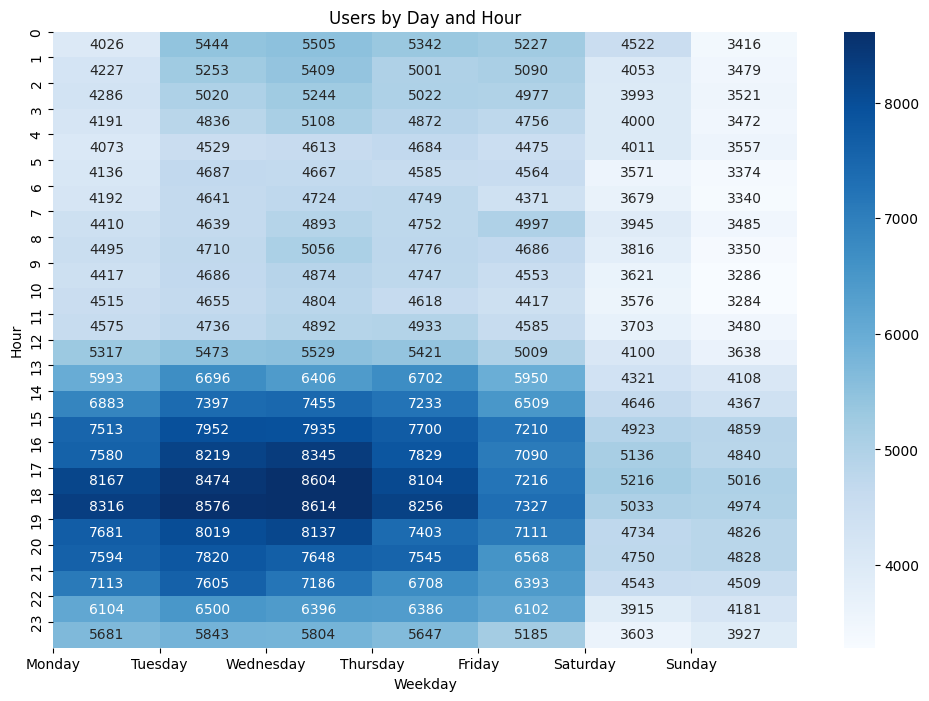

In [33]:
# 요일/시간대별 사용자 수 구하기
df3['weekday'] = df3['new_visit_time'].dt.weekday
df3['hour'] = df3['new_visit_time'].dt.hour
users_by_day_hour = df3.groupby(['hour', 'weekday']).size().unstack()

# heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(users_by_day_hour, cmap='Blues', annot=True, fmt='d')

# 요일과 시간대를 라벨로 설정
plt.title('Users by Day and Hour')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(np.arange(24), range(24))

plt.show()

C:\Users\parks\AppData\Local\Temp\ipykernel_7588\923070549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_revenue_df['weekday'] = zero_revenue_df['new_visit_time'].dt.weekday
C:\Users\parks\AppData\Local\Temp\ipykernel_7588\923070549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_revenue_df['hour'] = zero_revenue_df['new_visit_time'].dt.hour


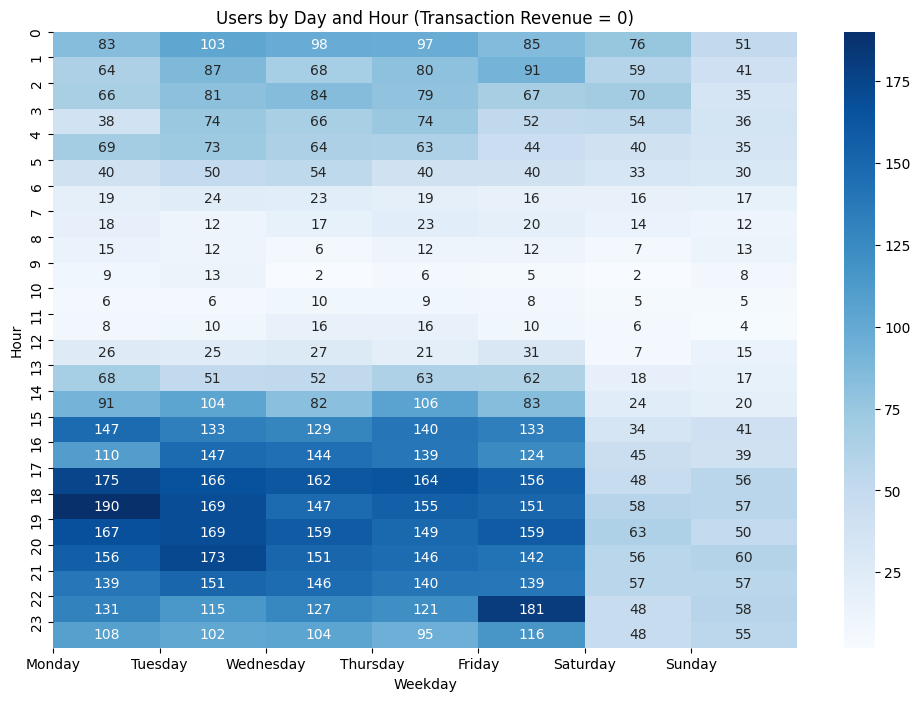

In [34]:
# transactionRevenue가 0이 아닌 필터링하여 새로운 데이터프레임을 생성합니다.
zero_revenue_df = df3[df3['transactionRevenue'] != 0]

# 요일과 시간대별로 그룹화하여 사용자 수를 계산합니다.
zero_revenue_df['weekday'] = zero_revenue_df['new_visit_time'].dt.weekday
zero_revenue_df['hour'] = zero_revenue_df['new_visit_time'].dt.hour
users_by_day_hour = zero_revenue_df.groupby(['hour', 'weekday']).size().unstack()

# heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(users_by_day_hour, cmap='Blues', annot=True, fmt='d')

# 요일과 시간대를 라벨로 설정
plt.title('Users by Day and Hour (Transaction Revenue = 0)')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(ticks=range(24), labels=range(24))

plt.show()

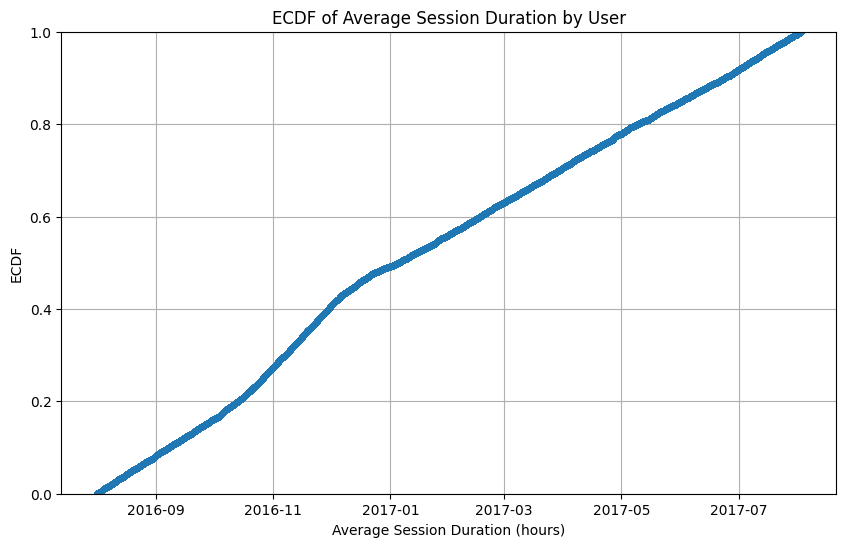

In [35]:
# 유저별 평균 접속시간 계산
user_avg_session_duration_by_user = df3.groupby('fullVisitorId')['new_visit_time'].mean()

# sns.ecdfplot으로 ECDF 그리기
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=user_avg_session_duration_by_user, marker='.', linestyle='none')
plt.title('ECDF of Average Session Duration by User')
plt.xlabel('Average Session Duration (hours)')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   visitStartTime      903653 non-null  int64         
 6   new_visit_time      903653 non-null  datetime64[ns]
 7   browser             903653 non-null  object        
 8   deviceCategory      903653 non-null  object        
 9   operatingSystem     903653 non-null  object        
 10  continent           903653 non-null  object        
 11  country             903653 non-null  object        
 12  source              903653 non-null  object        
 13  visits              903653 no

In [37]:
# visit 수에 따라 각 visit 수에 해당하는 fullVisitorId의 수를 계산합니다.
visit_counts_withRev = df3[df3['transactionRevenue'] > 0]['visitNumber'].value_counts()

# visit 수에 따른 fullVisitorId의 수를 출력합니다.
for visit_num, count in visit_counts_withRev.items():
    print(f"visit가 {visit_num}인 fullVisitorId의 수:", count)

visit가 1인 fullVisitorId의 수: 4465
visit가 2인 fullVisitorId의 수: 2511
visit가 3인 fullVisitorId의 수: 1431
visit가 4인 fullVisitorId의 수: 878
visit가 5인 fullVisitorId의 수: 555
visit가 6인 fullVisitorId의 수: 356
visit가 7인 fullVisitorId의 수: 246
visit가 8인 fullVisitorId의 수: 175
visit가 9인 fullVisitorId의 수: 149
visit가 10인 fullVisitorId의 수: 131
visit가 11인 fullVisitorId의 수: 76
visit가 12인 fullVisitorId의 수: 73
visit가 14인 fullVisitorId의 수: 50
visit가 13인 fullVisitorId의 수: 47
visit가 16인 fullVisitorId의 수: 35
visit가 15인 fullVisitorId의 수: 29
visit가 17인 fullVisitorId의 수: 25
visit가 18인 fullVisitorId의 수: 20
visit가 21인 fullVisitorId의 수: 18
visit가 20인 fullVisitorId의 수: 17
visit가 24인 fullVisitorId의 수: 17
visit가 22인 fullVisitorId의 수: 17
visit가 19인 fullVisitorId의 수: 15
visit가 26인 fullVisitorId의 수: 12
visit가 23인 fullVisitorId의 수: 12
visit가 31인 fullVisitorId의 수: 10
visit가 25인 fullVisitorId의 수: 10
visit가 28인 fullVisitorId의 수: 9
visit가 29인 fullVisitorId의 수: 8
visit가 30인 fullVisitorId의 수: 6
visit가 36인 fullVisitorId의 수: 5
visit가 3

In [38]:
# visit 수에 따라 각 visit 수에 해당하는 fullVisitorId의 수를 계산합니다.
visit_counts_noRev = df3[df3['transactionRevenue'] == 0]['visitNumber'].value_counts()

# visit 수에 따른 fullVisitorId의 수를 출력합니다.
for visit_num, count in visit_counts.items():
    print(f"visit가 {visit_num}인 fullVisitorId의 수:", count)

NameError: name 'visit_counts' is not defined

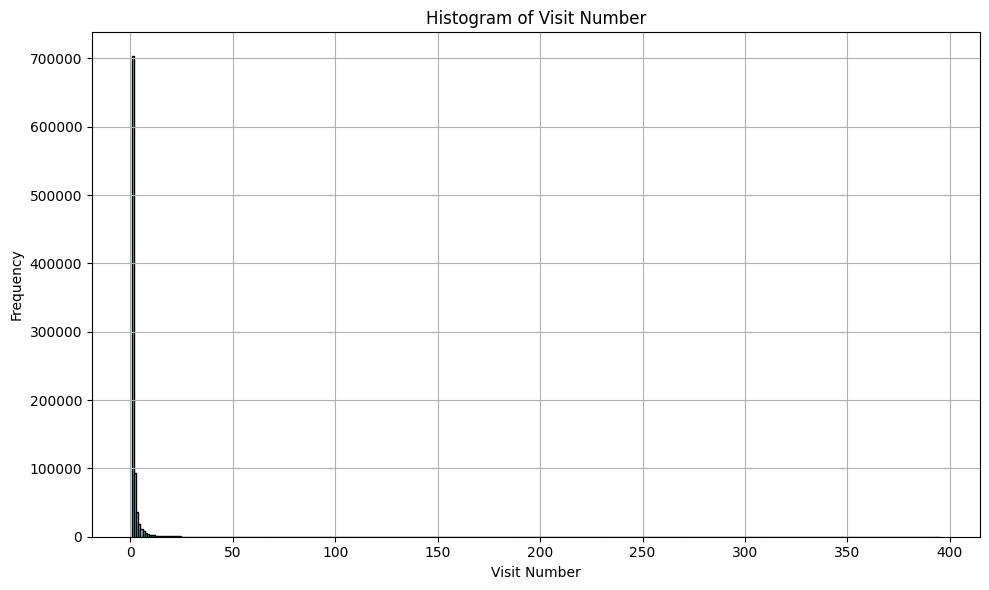

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6), facecolor='none')
plt.hist(df3['visitNumber'], bins=range(1, df3['visitNumber'].max() + 1), color='skyblue', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('Histogram of Visit Number')
plt.xlabel('Visit Number')
plt.ylabel('Frequency')

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()

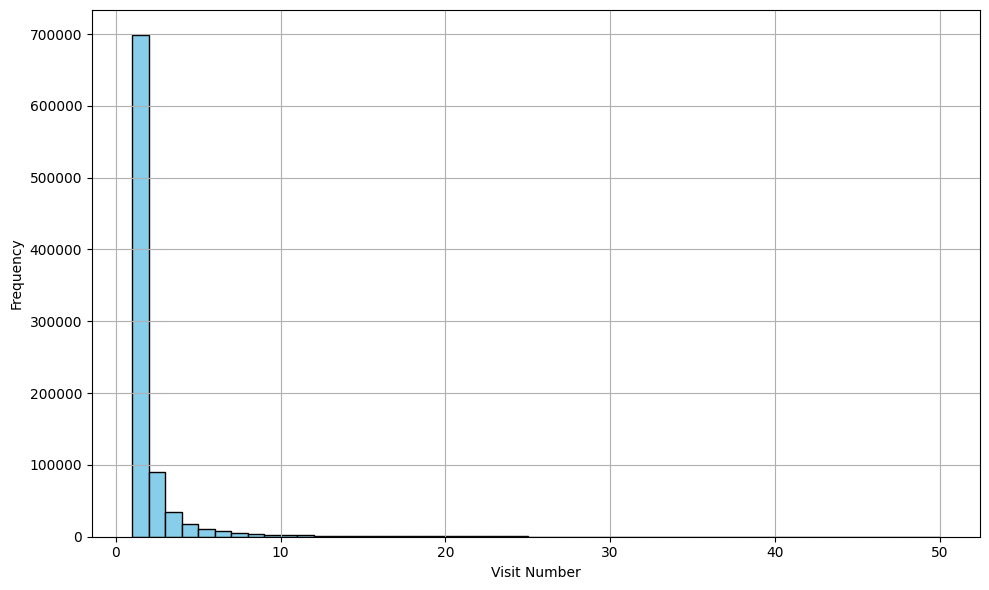

In [ ]:
# 방문 횟수가 1 이상이고 빈도가 10000 이하인 고객을 필터링합니다.
non_purchasing_customers = df3[(df3['visitNumber'] >= 1) & (df3['transactionRevenue'] == 0)]

# 히스토그램으로 방문 횟수 분포를 시각화합니다.
plt.figure(figsize=(10, 6), facecolor='none')
plt.hist(non_purchasing_customers['visitNumber'], bins=range(1, min(51, non_purchasing_customers['visitNumber'].max() + 1)), color='skyblue', edgecolor='black')
plt.xlabel('Visit Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

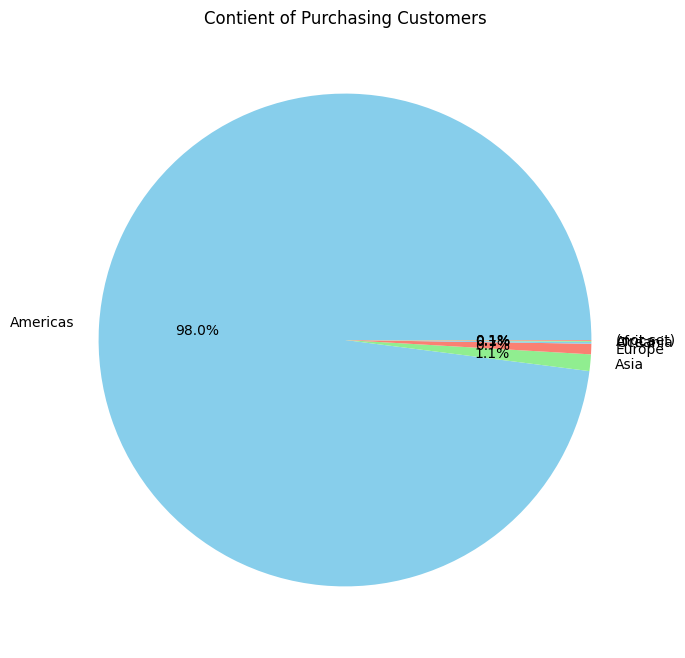

In [ ]:
# 장치 유형별로 구매한 고객 수를 계산합니다.
purchasing_customers_device = df3[df3['transactionRevenue'] > 0]['continent'].value_counts()

# 파이차트로 장치 유형별 구매한 고객 수를 시각화합니다.
plt.figure(figsize=(8, 8), facecolor='none')
plt.pie(purchasing_customers_device, labels=purchasing_customers_device.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Contient of Purchasing Customers')
plt.show()

C:\Users\parks\AppData\Local\Temp\ipykernel_23304\2582229583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purchasing_customers_device_excluding_americas = df3[df3['transactionRevenue'] > 0][df3['continent'] != 'Americas']['continent'].value_counts()


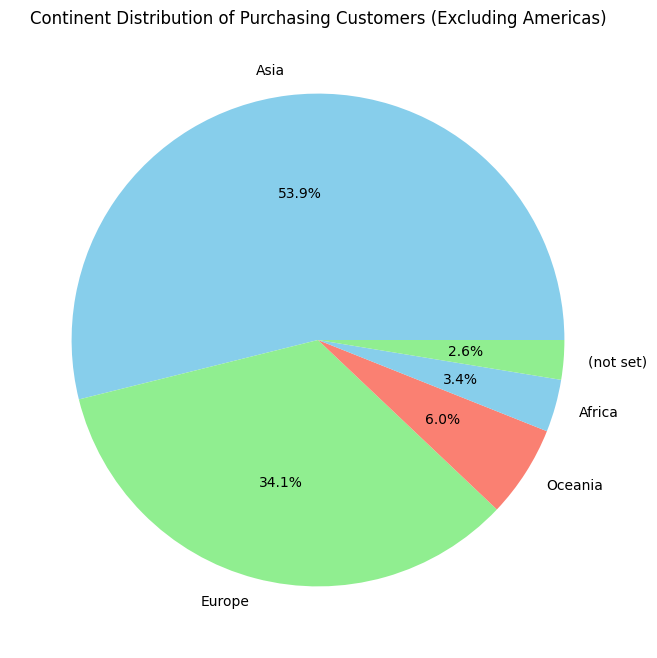

In [ ]:
# Americas를 제외한 장치 유형별 구매한 고객 수를 계산합니다.
purchasing_customers_device_excluding_americas = df3[df3['transactionRevenue'] > 0][df3['continent'] != 'Americas']['continent'].value_counts()

# 파이차트로 장치 유형별 구매한 고객 수를 시각화합니다.
plt.figure(figsize=(8, 8), facecolor='none')
plt.pie(purchasing_customers_device_excluding_americas, labels=purchasing_customers_device_excluding_americas.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Continent Distribution of Purchasing Customers (Excluding Americas)')
plt.show()

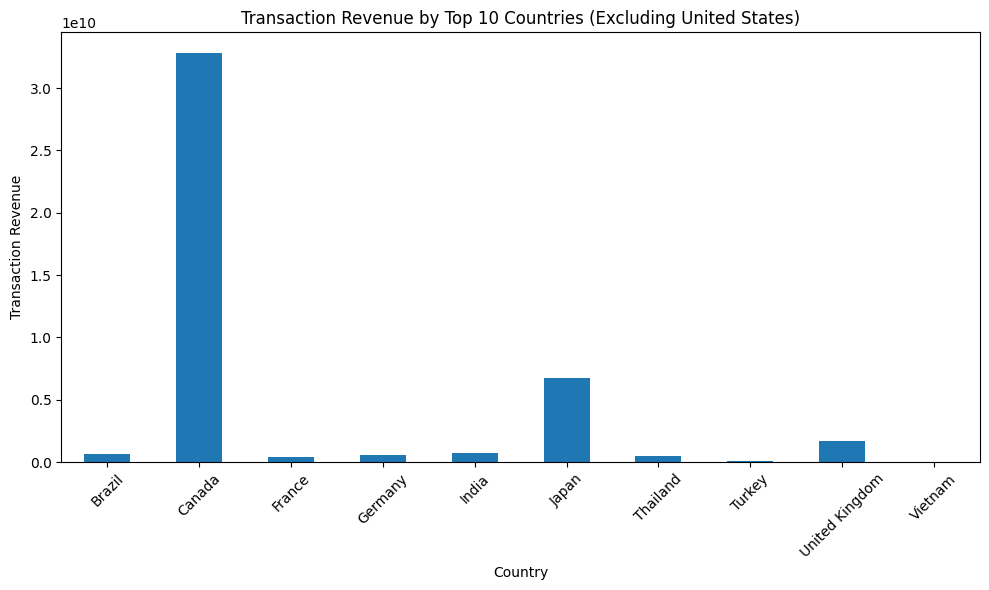

In [39]:
# United States를 제외한 다른 국가들만 필터링하여 상위 10개 국가를 구합니다.
top_countries_excluding_us = df3[df3['country'] != 'United States']['country'].value_counts().head(10)

# 상위 국가들의 transactionRevenue를 구합니다.
revenue_by_country = df3[df3['country'].isin(top_countries_excluding_us.index)].groupby('country')['transactionRevenue'].sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
revenue_by_country.plot(kind='bar')
plt.title('Transaction Revenue by Top 10 Countries (Excluding United States)')
plt.xlabel('Country')
plt.ylabel('Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# 전체 국가의 transactionRevenue를 구합니다.
revenue_by_country = df3.groupby('country')['transactionRevenue'].sum()

In [43]:
revenue_by_country

country
(not set)         769780000.0
Afghanistan               0.0
Albania                   0.0
Algeria                   0.0
American Samoa            0.0
                     ...     
Vietnam                   0.0
Yemen                     0.0
Zambia                    0.0
Zimbabwe                  0.0
Åland Islands             0.0
Name: transactionRevenue, Length: 222, dtype: float64

In [44]:
# transactionRevenue가 0이 아닌 값을 가진 행들만 선택하여 데이터프레임을 필터링합니다.
revenue_non_zero = df3[df3['transactionRevenue'] != 0]

# 필터링된 데이터프레임에서 국가별 transactionRevenue의 합을 계산합니다.
revenue_by_country = revenue_non_zero.groupby('country')['transactionRevenue'].sum()

print(revenue_by_country)

country
(not set)               7.697800e+08
Anguilla                1.099000e+07
Argentina               2.624400e+08
Armenia                 3.048000e+07
Australia               1.745260e+09
                            ...     
United Arab Emirates    3.700600e+08
United Kingdom          1.689450e+09
United States           1.452441e+12
Uruguay                 3.500000e+06
Venezuela               1.337490e+10
Name: transactionRevenue, Length: 69, dtype: float64


In [45]:
# transactionRevenue가 0이 아니고 '(not set)'이 아닌 값을 가진 행들만 선택하여 데이터프레임을 필터링합니다.
revenue_non_zero_not_set = df3[(df3['transactionRevenue'] != 0) & (df3['country'] != '(not set)')]

# 필터링된 데이터프레임에서 국가별 transactionRevenue의 합을 계산합니다.
revenue_by_country = revenue_non_zero_not_set.groupby('country')['transactionRevenue'].sum()

print(revenue_by_country)

country
Anguilla                1.099000e+07
Argentina               2.624400e+08
Armenia                 3.048000e+07
Australia               1.745260e+09
Belgium                 9.920500e+08
                            ...     
United Arab Emirates    3.700600e+08
United Kingdom          1.689450e+09
United States           1.452441e+12
Uruguay                 3.500000e+06
Venezuela               1.337490e+10
Name: transactionRevenue, Length: 68, dtype: float64


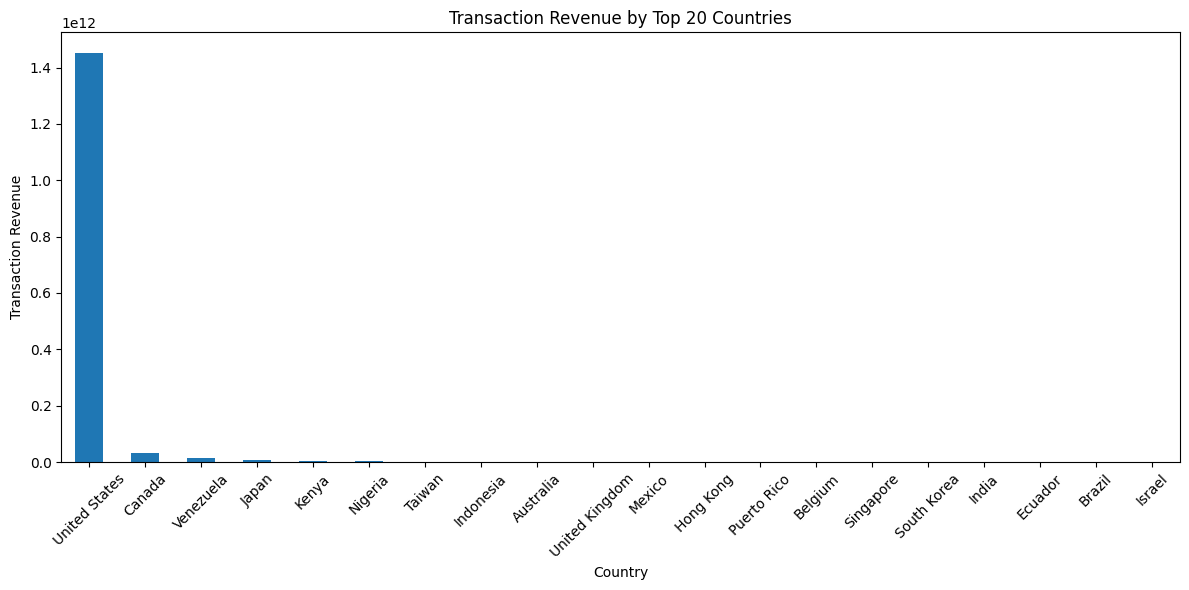

In [47]:
# transactionRevenue가 0이 아니고 '(not set)'이 아닌 값을 가진 행들만 선택하여 데이터프레임을 필터링합니다.
revenue_non_zero_not_set = df3[(df3['transactionRevenue'] != 0) & (df3['country'] != '(not set)')]

# 필터링된 데이터프레임에서 국가별 transactionRevenue의 합을 계산합니다.
revenue_by_country = revenue_non_zero_not_set.groupby('country')['transactionRevenue'].sum()

# 상위 20개 국가를 선택합니다.
top_20_countries = revenue_by_country.nlargest(20)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
top_20_countries.plot(kind='bar')
plt.title('Transaction Revenue by Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

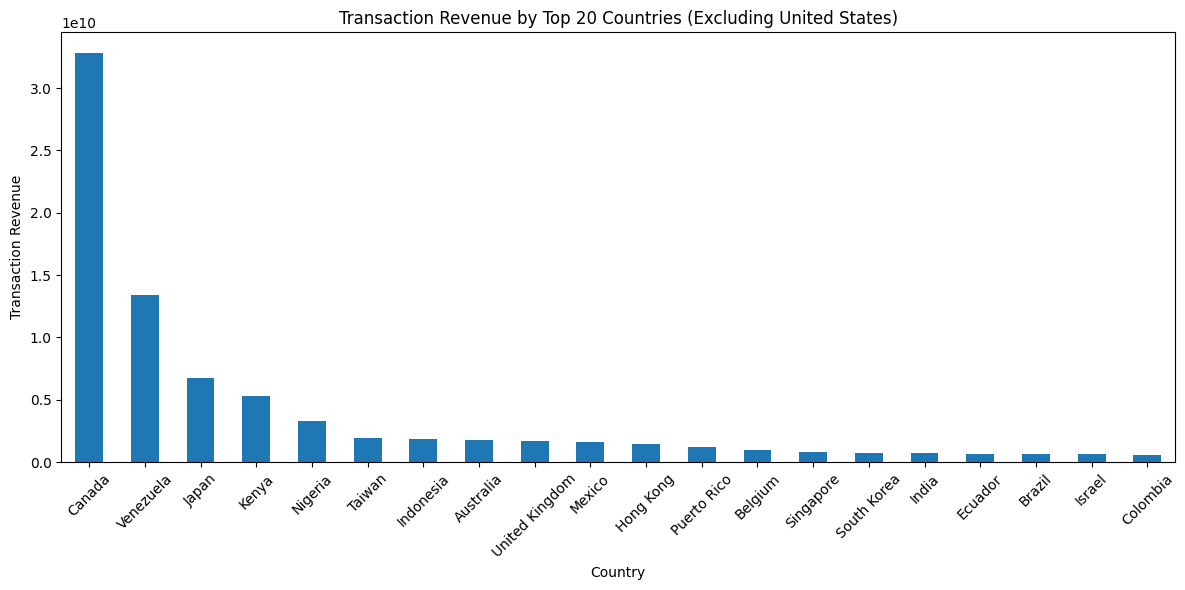

In [48]:
# 미국을 제외한 transactionRevenue가 0이 아니고 '(not set)'이 아닌 값을 가진 행들만 선택하여 데이터프레임을 필터링합니다.
revenue_non_zero_not_set_excluding_us = df3[(df3['transactionRevenue'] != 0) & (df3['country'] != '(not set)') & (df3['country'] != 'United States')]

# 필터링된 데이터프레임에서 국가별 transactionRevenue의 합을 계산합니다.
revenue_by_country_excluding_us = revenue_non_zero_not_set_excluding_us.groupby('country')['transactionRevenue'].sum()

# 상위 20개 국가를 선택합니다.
top_20_countries_excluding_us = revenue_by_country_excluding_us.nlargest(20)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
top_20_countries_excluding_us.plot(kind='bar')
plt.title('Transaction Revenue by Top 20 Countries (Excluding United States)')
plt.xlabel('Country')
plt.ylabel('Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   visitStartTime      903653 non-null  int64         
 6   new_visit_time      903653 non-null  datetime64[ns]
 7   browser             903653 non-null  object        
 8   deviceCategory      903653 non-null  object        
 9   operatingSystem     903653 non-null  object        
 10  continent           903653 non-null  object        
 11  country             903653 non-null  object        
 12  source              903653 non-null  object        
 13  visits              903653 no

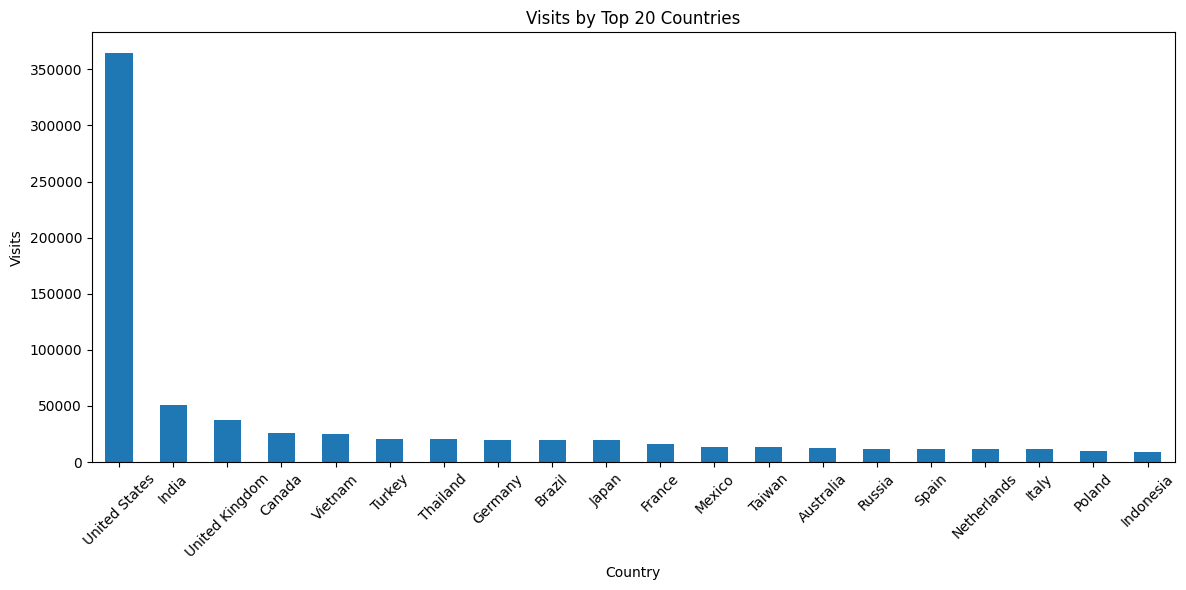

In [54]:
# 국가별 visits의 합을 계산합니다.
visits_by_country = df3.groupby('country')['visits'].sum()

# 상위 20개 국가를 선택합니다.
top_20_countries_visits = visits_by_country.nlargest(20)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
top_20_countries_visits.plot(kind='bar')
plt.title('Visits by Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

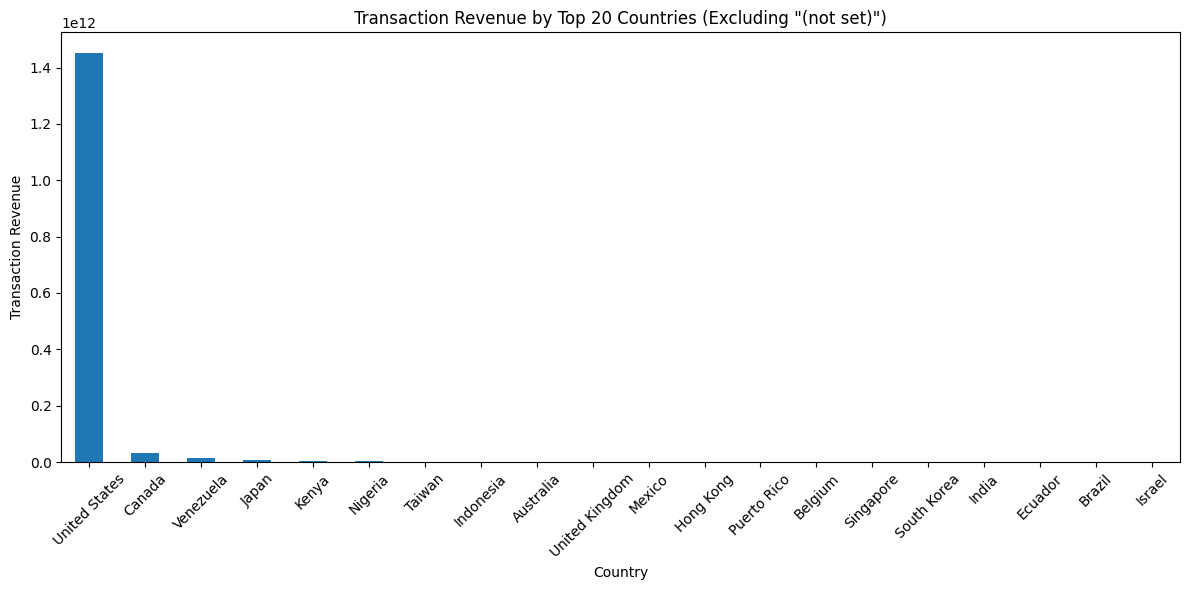

In [56]:
# '(not set)' 값을 제외한 transactionRevenue가 0이 아닌 값들만 선택하여 데이터프레임을 필터링합니다.
revenue_non_zero_not_set = df3[(df3['transactionRevenue'] != 0) & (df3['country'] != '(not set)')]

# 필터링된 데이터프레임에서 국가별 transactionRevenue의 합을 계산합니다.
revenue_by_country_filtered = revenue_non_zero_not_set.groupby('country')['transactionRevenue'].sum()

# 상위 20개 국가를 선택합니다.
top_20_countries_revenue_filtered = revenue_by_country_filtered.nlargest(20)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
top_20_countries_revenue_filtered.plot(kind='bar')
plt.title('Transaction Revenue by Top 20 Countries (Excluding "(not set)")')
plt.xlabel('Country')
plt.ylabel('Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

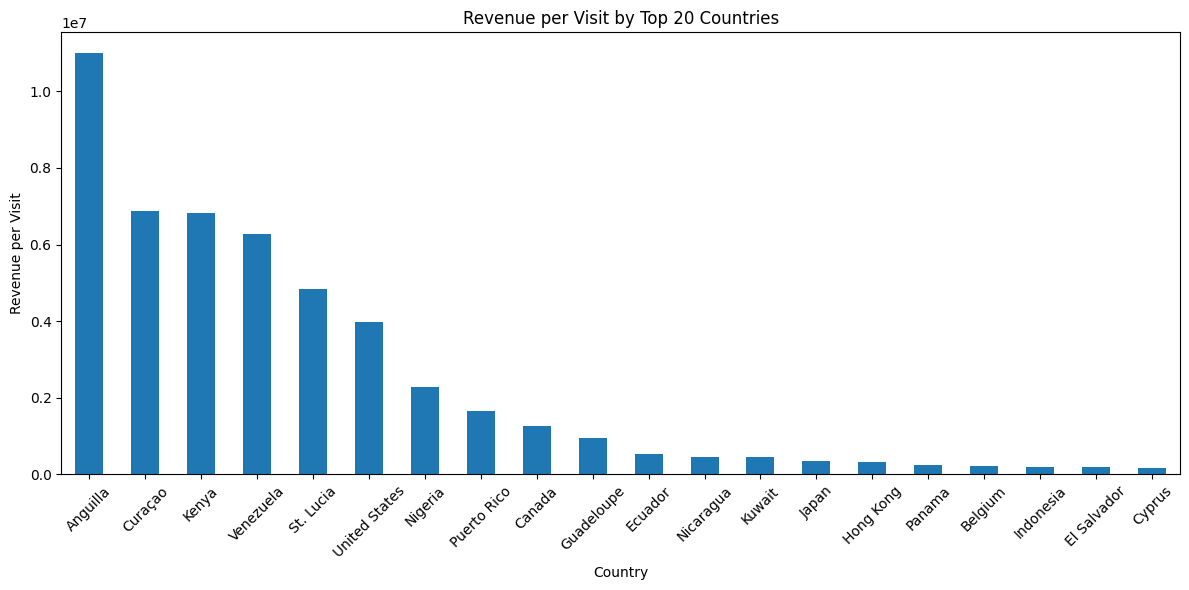

In [57]:
# 국가별 방문 수와 transaction revenue를 계산합니다.
visits_revenue_by_country = df3.groupby('country').agg({'visits': 'sum', 'transactionRevenue': 'sum'})

# visits당 revenue를 계산합니다.
visits_revenue_by_country['revenue_per_visit'] = visits_revenue_by_country['transactionRevenue'] / visits_revenue_by_country['visits']

# '(not set)' 값을 제외합니다.
visits_revenue_by_country = visits_revenue_by_country[visits_revenue_by_country.index != '(not set)']

# 상위 20개 국가를 선택합니다.
top_20_countries_revenue_per_visit = visits_revenue_by_country.nlargest(20, 'revenue_per_visit')

plt.figure(figsize=(12, 6))
top_20_countries_revenue_per_visit['revenue_per_visit'].plot(kind='bar')
plt.title('Revenue per Visit by Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Revenue per Visit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



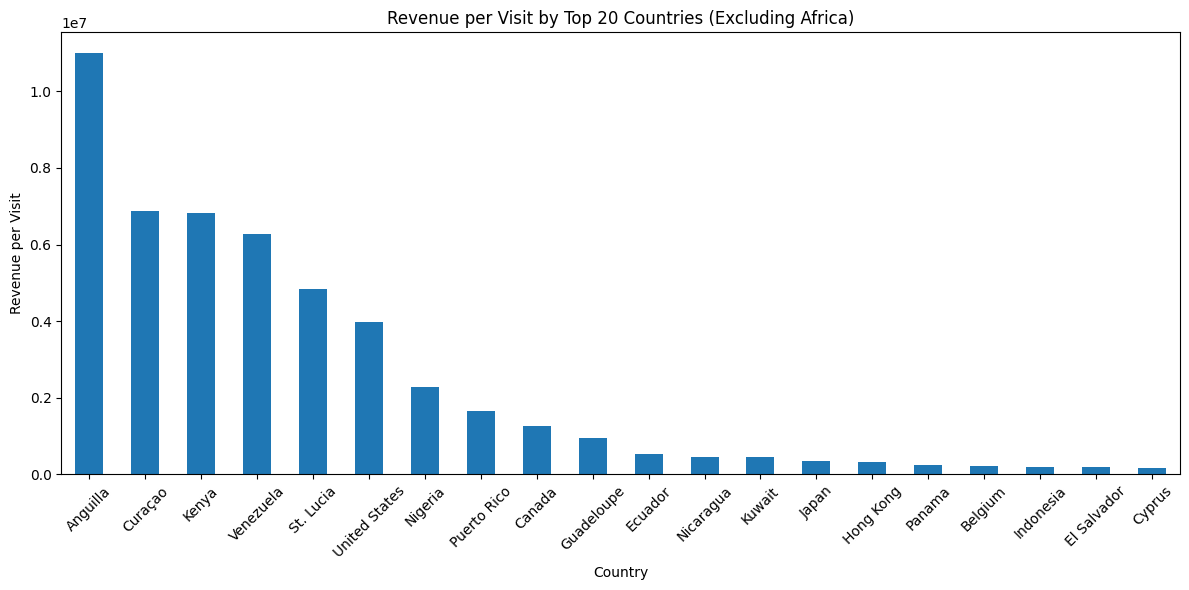

In [71]:
# 국가별 방문 수와 transaction revenue를 계산합니다.
visits_revenue_by_country = df3.groupby('country').agg({'visits': 'sum', 'transactionRevenue': 'sum'})

# visits당 revenue를 계산합니다.
visits_revenue_by_country['revenue_per_visit'] = visits_revenue_by_country['transactionRevenue'] / visits_revenue_by_country['visits']

# '(not set)' 값을 제외합니다.
visits_revenue_by_country = visits_revenue_by_country[visits_revenue_by_country.index != '(not set)']

# 상위 20개 국가를 선택합니다.
top_20_countries_revenue_per_visit = visits_revenue_by_country.nlargest(20, 'revenue_per_visit')

plt.figure(figsize=(12, 6))
top_20_countries_revenue_per_visit['revenue_per_visit'].plot(kind='bar')
plt.title('Revenue per Visit by Top 20 Countries (Excluding Africa)')
plt.xlabel('Country')
plt.ylabel('Revenue per Visit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [64]:
df3[df3['country'] == 'South Korea']['transactionRevenue'].sum()

745710000.0